In [58]:
import glob, os, pandas as pd, numpy as np, matplotlib.pyplot as plt

from itertools import product

if not os.path.isdir('statistics'):
    os.mkdir('statistics')

In [68]:
strategy_names = ['RSI']

tickers = ['MSFT', 'NYT']

delays = [0, 100, 1000, 10000]

stats_list = []
returns_list = []
std_list = []

combinations = product(strategy_names, tickers)
for combination in combinations:
    (strategy, ticker) = combination
    
    # signals stats
    filenames = glob.glob('output/' + ticker + "_" + strategy + "_signals_*.csv")
    
    df_list = []
    for filename in filenames:
        df_list.append(pd.read_csv(filename))
    
    df_combined = pd.concat(df_list)

    df_combined['TIME'] = pd.to_datetime(df_combined['TIME']).dt.date
    
    stats = df_combined.groupby('SIGNAL')['TIME'].count()
    
    stats.name = strategy + "|" + ticker
    
    stats.rename(lambda x: "Sell" if x==-1 else "Buy", inplace=True)
    
    stats_list.append(stats)
    
    #tradebook stats
    filenames = glob.glob('output/' + ticker + "_" + strategy + "_tradebook_*.csv")
    
    
    
    returns = {delay : [] for delay in delays}
    
    for filename in filenames:
        tradebook = pd.read_csv(filename, index_col=0)
#         date = filename.split("_")[-1].split(".")[0]
        
        for delay in delays:
            series = tradebook['OUTSTANDING_BALANCE_' + str(delay)].dropna().sort_index(ascending=True)
            
            returns[delay] += [(series[-1] - series[0])/series[0]]
            

        
    return_series = pd.Series({delay: np.mean(returns[delay]) for delay in delays})
    return_series.name = strategy + "|" + ticker
    
    returns_list.append(return_series)
    
    std_series = pd.Series({delay: np.std(returns[delay]) for delay in delays})
    std_series.name = strategy + "|" + ticker
    
    std_list.append(std_series)
      
trade_stats_combined = pd.concat(stats_list, axis=1)
returns_combined = pd.concat(returns_list, axis=1)
std_combined = pd.concat(std_list, axis=1)

print(trade_stats_combined)
print(returns_combined)
print(std_combined)

        RSI|MSFT  RSI|NYT
SIGNAL                   
Sell        2673    14943
Buy         1796    16129
       RSI|MSFT   RSI|NYT
0     -0.332327 -0.026188
100   -0.332375 -0.026188
1000  -0.001465  0.292081
10000 -0.333046 -0.038080
       RSI|MSFT   RSI|NYT
0      0.472116  0.011976
100    0.472083  0.011976
1000   0.004559  0.471324
10000  0.471608  0.012430


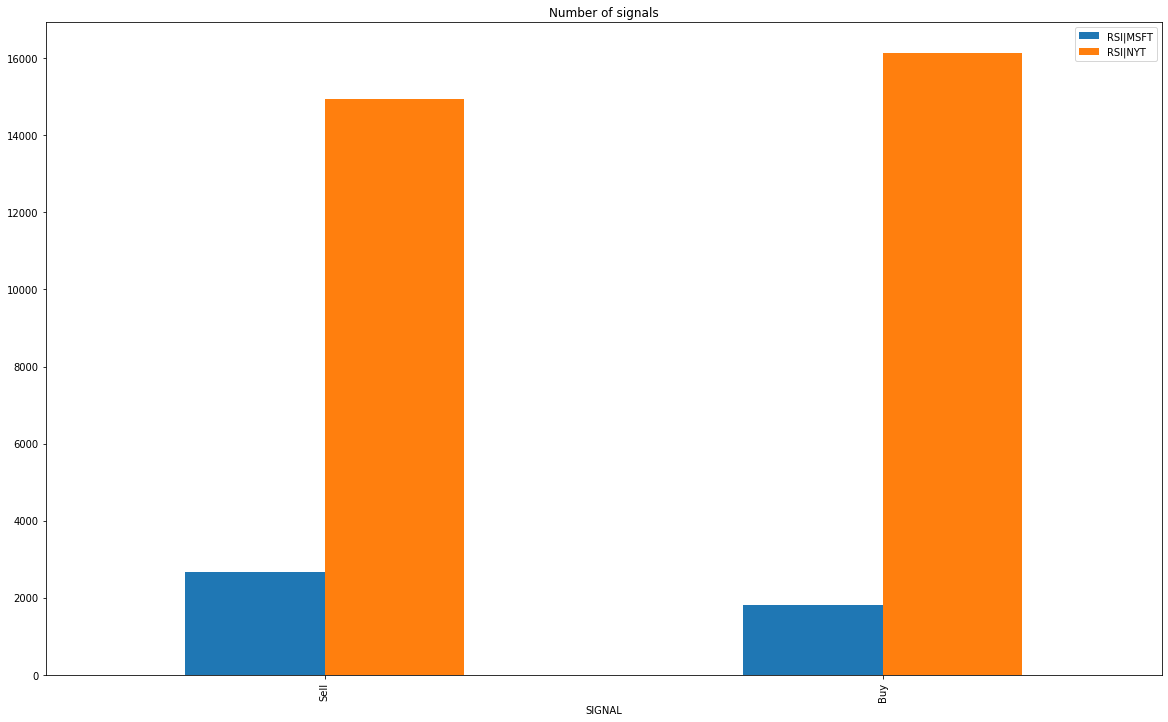

In [69]:
trade_stats_combined.plot.bar(figsize=(20,12))

plt.title('Number of signals')
# plt.xlabel('Buy/Sell')
# plt.ylabel('Returns')

plt.savefig(os.path.join('statistics', 'number_of_signals_bar.jpg'), format='jpeg')




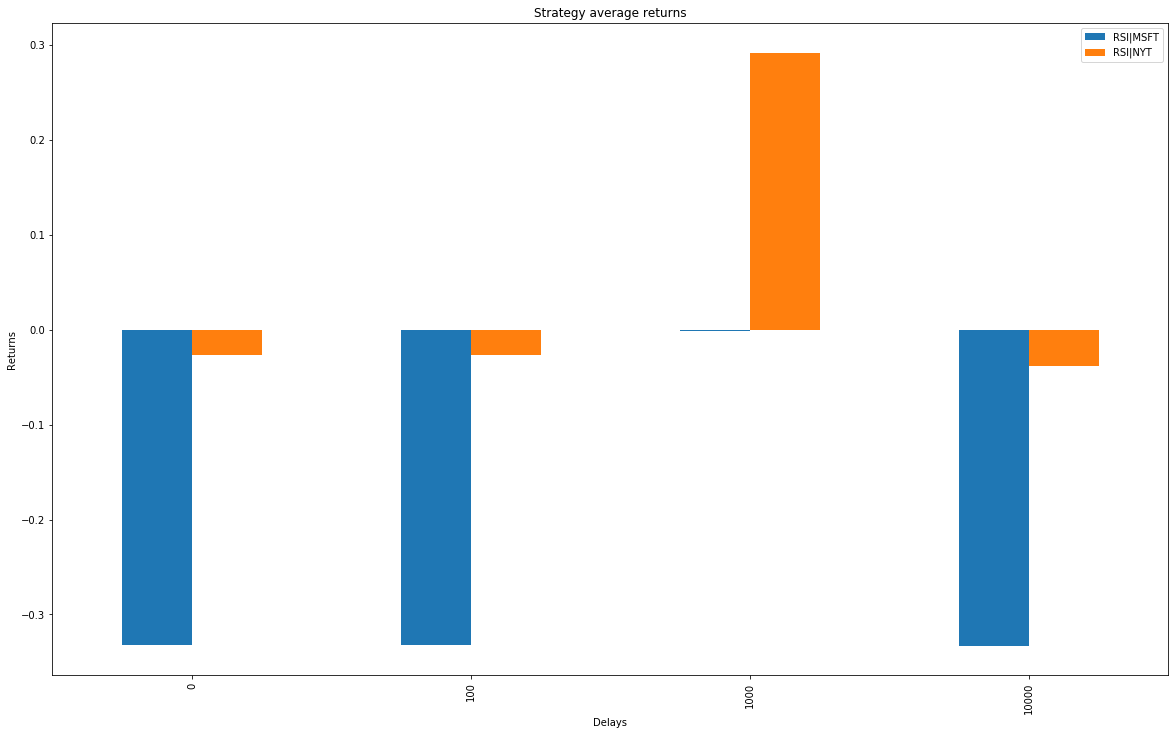

In [70]:
returns_combined.plot.bar(figsize=(20,12))

plt.title('Strategy average returns')
plt.xlabel('Delays')
plt.ylabel('Returns')

plt.savefig(os.path.join('statistics', 'strategy_returns_bar.jpg'), format='jpeg')



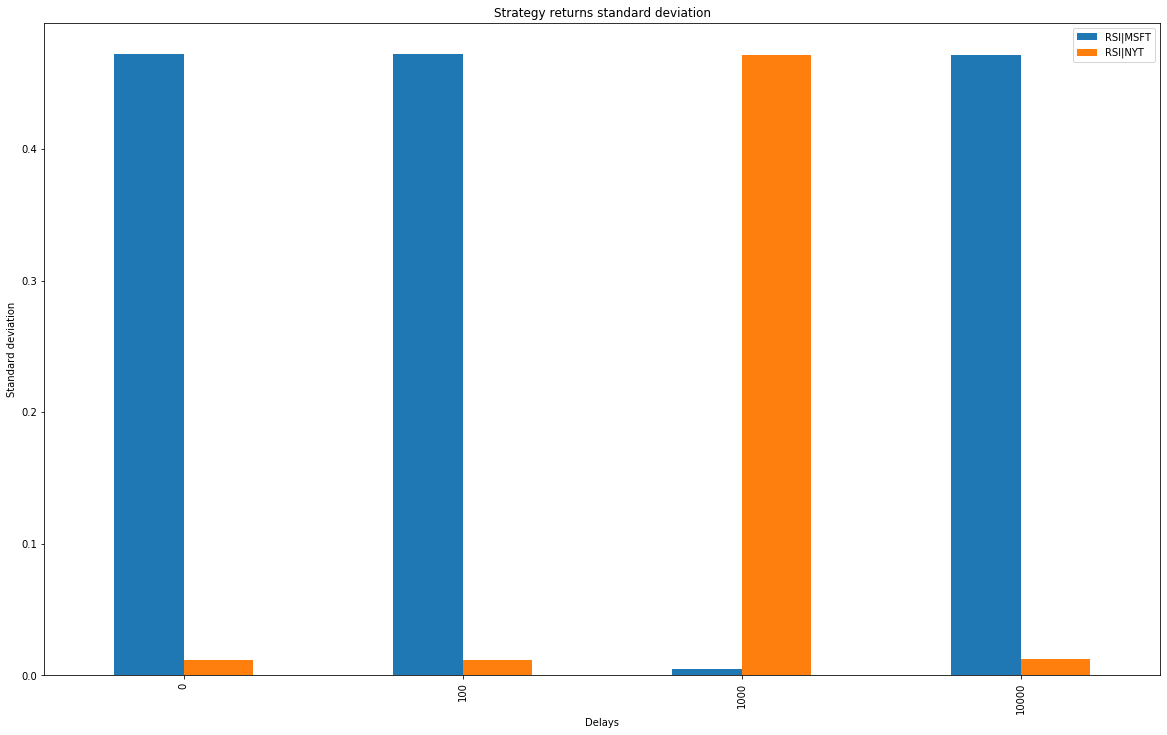

In [71]:
std_combined.plot.bar(figsize=(20,12))

plt.title('Strategy returns standard deviation')
plt.xlabel('Delays')
plt.ylabel('Standard deviation')

plt.savefig(os.path.join('statistics', 'strategy_std_bar.jpg'), format='jpeg')


